# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [305]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Ella\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1


In [306]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [307]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [308]:
print('Lead Time Summary:')
df['lead_time'].describe()

Lead Time Summary:


count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [309]:
print('ADR Summary:')
df['adr'].describe()

ADR Summary:


count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [310]:
print(f"Lead Time Skewness: {df['lead_time'].skew():.2f}")
print(f"ADR Skewness: {df['adr'].skew():.2f}")

Lead Time Skewness: 1.35
ADR Skewness: 10.53


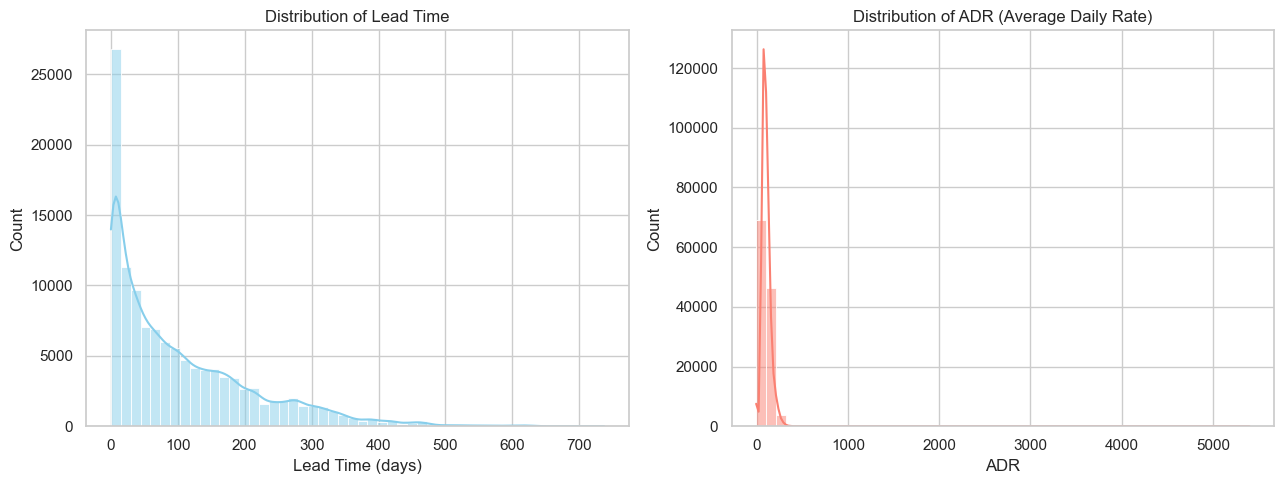

In [311]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))


sns.histplot(df['lead_time'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Lead Time')
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Count')

sns.histplot(df['adr'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of ADR (Average Daily Rate)')
axes[1].set_xlabel('ADR')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


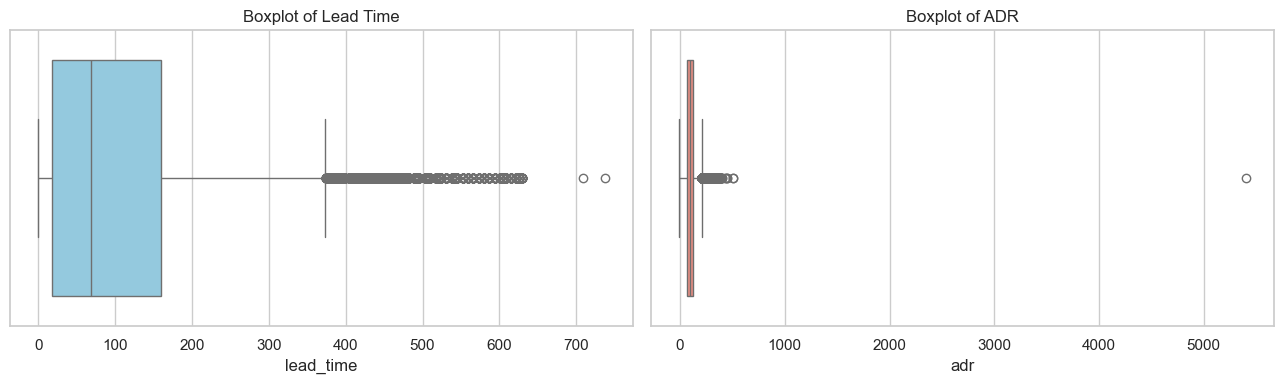

In [312]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.boxplot(x=df['lead_time'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Lead Time')
sns.boxplot(x=df['adr'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of ADR')
plt.tight_layout()
plt.show()

## **Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

In the summary statistics and histogram, the lead_time is highly right-skewed. The skewness value (1.35) also confirms the right-skewed nature. Most bookings are made with relatively short notice but some bookings have very long lead times, creating a long tail. The boxplot reveals several outliers with extremely high lead times, indicating a few guests book far in advance. The adr is also right-skewed. The skewness value (10.53) again confirms the right-skewed distribution. Most bookings cluster around lower ADR values, but some have very high rates, likely due to special events, luxury rooms, or data anomalies.The boxplot for adr shows outliers, due to some guests pay much more than the typical rate or due to premium bookings. All in all, The typical booking is made with a short to moderate lead time and at a moderate daily rate. Both variables have a long right tail, showing the presence of extreme cases (very early bookings and very high rates). The distributions are not symmetric, so median values may better represent the typical case than means. Outliers should be considered in further analysis, as they may impact aggregate statistics and model performance.



## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [313]:
lead_time_by_cancel = df.groupby('is_canceled')['lead_time'].agg(
    count='count', 
    mean='mean', 
    median='median', 
    std='std', 
    min='min', 
    max='max'
)
cancel_rate_pct = df['is_canceled'].mean() * 100
print(f"overall cancellation rate: {cancel_rate_pct:.2f}%")
display(lead_time_by_cancel)

overall cancellation rate: 37.04%


,count,mean,median,std,min,max
is_canceled,,,,,,
0,75166,79.984687,45.0,91.109888,0,737
1,44224,144.848815,113.0,118.624829,0,629


C:\Users\Ella\AppData\Local\Temp\ipykernel_7028\2296401963.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not canceled','Canceled'])


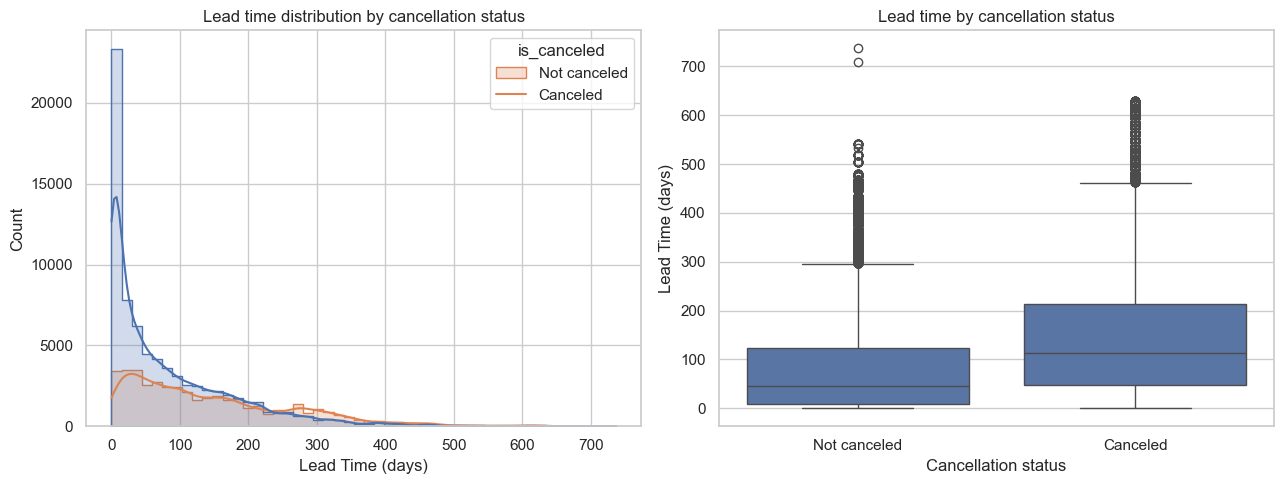

In [314]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True,
             ax=axes[0], element='step', stat='count')
axes[0].set_title('Lead time distribution by cancellation status')
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Count')
axes[0].legend(title='is_canceled', labels=['Not canceled','Canceled'])

sns.boxplot(data=df, x='is_canceled', y='lead_time', ax=axes[1])
axes[1].set_xticklabels(['Not canceled','Canceled'])
axes[1].set_title('Lead time by cancellation status')
axes[1].set_xlabel('Cancellation status')
axes[1].set_ylabel('Lead Time (days)')

plt.tight_layout()
plt.show()


## **Question**: Do bookings with longer lead times tend to cancel more often?

Bookings with longer lead times tend to cancel more often. The data shows a positive relationship between lead time and cancellation times. Canceled bookings have higher lead times across all central measures, the histogram reveals a rightward shift in the canceled distribution, concentrating more observations at longer horizons, while the boxplot confirms that canceled bookings have a higher central tendency and extended upper tail. Standard deviation is also larger for canceled bookings indicating greater spread among long-horizon reservations. This pattern is consistent suggesting that guests who book far in advance are more likely to cancel, this implies that long-horizon bookings warrant higher cancellation-risk flags and more conservative capacity planning strategies.

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [315]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df_q3 = df.copy()
df_q3 = df_q3[df_q3['adr'].notna() & (df_q3['adr'] > 0)]

adr_month_hotel = (
    df_q3.groupby(['hotel','arrival_date_month'], as_index=False)['adr']
       .mean()
)
adr_month_hotel['arrival_date_month'] = pd.Categorical(
    adr_month_hotel['arrival_date_month'], categories=month_order, ordered=True
)
adr_month_hotel = adr_month_hotel.sort_values(['arrival_date_month','hotel'])
display(adr_month_hotel.head(24))

,hotel,arrival_date_month,adr
4,City Hotel,January,84.092043
16,Resort Hotel,January,50.924840
3,City Hotel,February,86.659138
15,Resort Hotel,February,56.204366
7,City Hotel,March,93.937705
19,Resort Hotel,March,58.647185
0,City Hotel,April,112.363455
12,Resort Hotel,April,79.210271
8,City Hotel,May,123.301149
20,Resort Hotel,May,80.315244


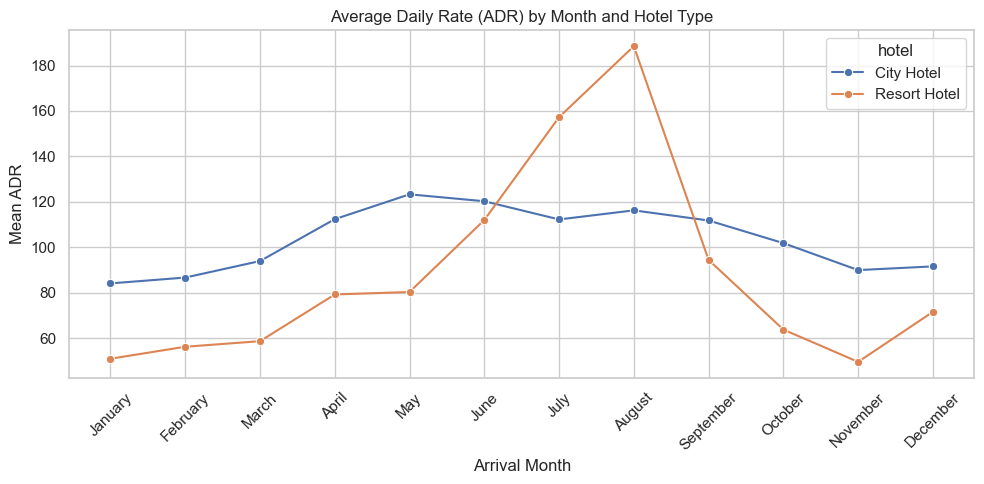

In [316]:
plt.figure(figsize=(10,5))
sns.lineplot(data=adr_month_hotel, x='arrival_date_month', y='adr', hue='hotel', marker='o')
plt.title('Average Daily Rate (ADR) by Month and Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Mean ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [317]:
pv = adr_month_hotel.pivot(index='arrival_date_month', columns='hotel', values='adr').reindex(month_order)
pv['diff_resort_minus_city'] = pv.get('Resort Hotel') - pv.get('City Hotel')
pv['abs_diff'] = pv['diff_resort_minus_city'].abs()
display(pv)

top3 = pv.sort_values('abs_diff', ascending=False).head(3)
print('Top 3 months by ADR difference (Resort - City):')
for m, r in top3.iterrows():
    print(f"{m}: Resort {r.get('Resort Hotel', float('nan')):.2f} vs City {r.get('City Hotel', float('nan')):.2f} — Diff {r['diff_resort_minus_city']:.2f}")

hotel,City Hotel,Resort Hotel,diff_resort_minus_city,abs_diff
arrival_date_month,,,,
January,84.092043,50.924840,-33.167203,33.167203
February,86.659138,56.204366,-30.454772,30.454772
March,93.937705,58.647185,-35.290519,35.290519
April,112.363455,79.210271,-33.153185,33.153185
May,123.301149,80.315244,-42.985905,42.985905
June,120.262647,111.989431,-8.273217,8.273217
July,112.247017,157.279273,45.032256,45.032256
August,116.246280,188.524040,72.277760,72.277760
September,111.787214,94.437051,-17.350163,17.350163


Top 3 months by ADR difference (Resort - City):
August: Resort 188.52 vs City 116.25 — Diff 72.28
July: Resort 157.28 vs City 112.25 — Diff 45.03
May: Resort 80.32 vs City 123.30 — Diff -42.99


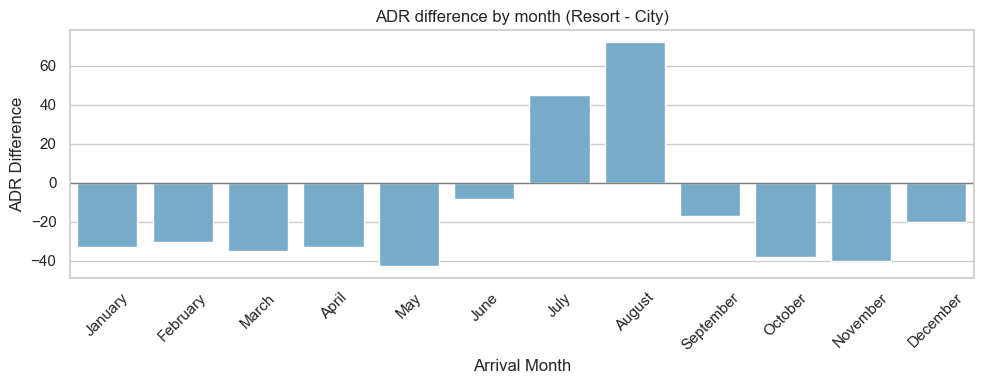

In [318]:
plt.figure(figsize=(10,4))
sns.barplot(x=pv.index, y=pv['diff_resort_minus_city'], color='#6baed6')
plt.axhline(0, color='gray', linewidth=1)
plt.title('ADR difference by month (Resort - City)')
plt.xlabel('Arrival Month')
plt.ylabel('ADR Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?



Resort and City hotels show clearly different seasonal pricing patterns. City ADR is comparatively steady and elevated in spring through early fall (roughly April–October, peaking around April–June), however Resort ADR is highly seasonal, low in winter/spring (in  January–May), then surging in peak summer to its annual highs (in July and in August) before falling back in autumn. The most pronounced differences are in summer when resorts outprice cities by wide margins, especially August and July, while the pattern flips in several cold months with cities higher than resorts, notably May, November, and October.

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [319]:
sns.set(style="whitegrid")

In [320]:
df_q4 = df.copy()
df_q4['is_repeated_guest'] = df_q4['is_repeated_guest'].fillna(0).astype(int)

summary = df_q4.groupby('is_repeated_guest').agg(
    bookings=('is_canceled','count'),
    cancellations=('is_canceled','sum'),
    cancellation_rate=('is_canceled','mean'),
    mean_lead_time=('lead_time','mean'),
    median_lead_time=('lead_time','median'),
    mean_booking_changes=('booking_changes','mean'),
    median_booking_changes=('booking_changes','median'),
    mean_previous_cancellations=('previous_cancellations','mean')
)
summary['cancellation_rate_pct'] = (summary['cancellation_rate'] * 100).round(2)

display(summary[['bookings','cancellations','cancellation_rate_pct','mean_lead_time','median_lead_time','mean_booking_changes','median_booking_changes']])


,bookings,cancellations,cancellation_rate_pct,mean_lead_time,median_lead_time,mean_booking_changes,median_booking_changes
is_repeated_guest,,,,,,,
0,115580,43672,37.79,106.425221,72.0,0.219692,0.0
1,3810,552,14.49,30.786352,3.0,0.264567,0.0


In [321]:
labels = {0: 'First-time', 1: 'Repeated'}
for k, name in labels.items():
    if k in summary.index:
        r = summary.loc[k]
        print(f"{name}: Cancellation {r['cancellation_rate']*100:.2f}% — mean lead_time {r['mean_lead_time']:.1f} days — mean booking_changes {r['mean_booking_changes']:.2f}")
    else:
        print(f"{name}: no observations")

First-time: Cancellation 37.79% — mean lead_time 106.4 days — mean booking_changes 0.22
Repeated: Cancellation 14.49% — mean lead_time 30.8 days — mean booking_changes 0.26


C:\Users\Ella\AppData\Local\Temp\ipykernel_7028\1056040408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_plot, x='label', y='cancellation_rate_pct', palette='muted')


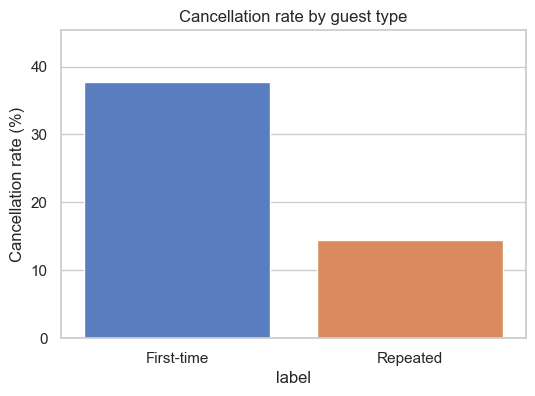

In [322]:
summary_plot = summary.reindex([0,1]).reset_index()
summary_plot['label'] = summary_plot['is_repeated_guest'].map(labels)
plt.figure(figsize=(6,4))
sns.barplot(data=summary_plot, x='label', y='cancellation_rate_pct', palette='muted')
plt.ylabel('Cancellation rate (%)')
plt.title('Cancellation rate by guest type')
plt.ylim(0, max(5, summary_plot['cancellation_rate_pct'].max() * 1.2))
plt.show()

C:\Users\Ella\AppData\Local\Temp\ipykernel_7028\748574557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_repeated_guest', y=np.log1p(df_q4['lead_time']), data=df_q4, palette='pastel')


Text(0.5, 1.0, 'Lead time (log1p) by guest type')

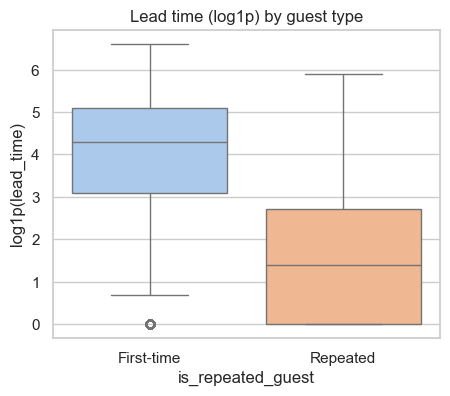

In [323]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.boxplot(x='is_repeated_guest', y=np.log1p(df_q4['lead_time']), data=df_q4, palette='pastel')
plt.xticks([0,1], ['First-time','Repeated'])
plt.ylabel('log1p(lead_time)')
plt.title('Lead time (log1p) by guest type')

C:\Users\Ella\AppData\Local\Temp\ipykernel_7028\2062231861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_repeated_guest', y='booking_changes', data=df_q4, palette='pastel')


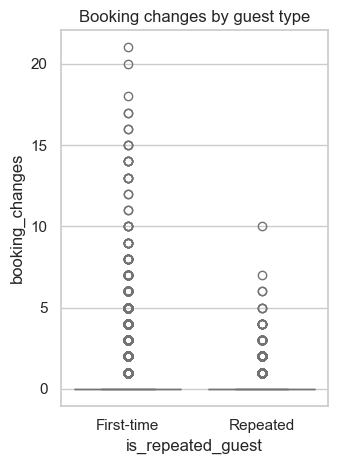

In [324]:
plt.subplot(1,2,2)
sns.boxplot(x='is_repeated_guest', y='booking_changes', data=df_q4, palette='pastel')
plt.xticks([0,1], ['First-time','Repeated'])
plt.title('Booking changes by guest type')
plt.tight_layout()
plt.show()

## **Question:** Do repeated guests behave differently from first-time guests?

First-time guests cancel far more often than repeated guests. Repeaters are much more likely to follow through on stays. First-time guests book much earlier and show a long right tail while repeated guests book closer to arrival. So repeaters tend to book last-minute. Both groups make very few changes on average, distributions are sparse with a few outliers, no meaningful behavioral gap here. Repeat guests are more reliable (lower cancellations) and tend to book closer to the stay date, while first-timers book farther in advance and cancel more frequently.


## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [325]:
df_q5 = df.copy()
df_q5['is_repeated_guest'] = df_q5['is_repeated_guest'].fillna(0).astype(int)

In [326]:
print("Pattern 1: Lead Time × Deposit Type")
lt_dep = df_q5.groupby(['deposit_type', 'is_canceled']).agg(
    count=('is_canceled', 'count'),
    mean_lead_time=('lead_time', 'mean')
).reset_index()
cancel_by_deposit = df_q5.groupby('deposit_type')['is_canceled'].agg(['sum', 'count', 'mean']).round(4)
cancel_by_deposit['cancel_pct'] = (cancel_by_deposit['mean'] * 100).round(2)
display(cancel_by_deposit[['sum', 'count', 'cancel_pct']])

deposit_lead = pd.crosstab(df_q5['deposit_type'], df_q5['is_canceled'], 
                           values=df_q5['lead_time'], aggfunc='mean').round(2)
print("\nMean Lead Time by Deposit Type and Cancellation Status:")
display(deposit_lead)

Pattern 1: Lead Time × Deposit Type


,sum,count,cancel_pct
deposit_type,,,
No Deposit,29694,104641,28.38
Non Refund,14494,14587,99.36
Refundable,36,162,22.22



Mean Lead Time by Deposit Type and Cancellation Status:


is_canceled,0,1
deposit_type,,
No Deposit,79.83,111.28
Non Refund,106.22,213.59
Refundable,151.33,154.81


In [327]:
print("Pattern 2: Lead Time × Customer Type")
cancel_by_cust = df_q5.groupby('customer_type')['is_canceled'].agg(['sum', 'count', 'mean']).round(4)
cancel_by_cust['cancel_pct'] = (cancel_by_cust['mean'] * 100).round(2)
display(cancel_by_cust[['sum', 'count', 'cancel_pct']])

Pattern 2: Lead Time × Customer Type


,sum,count,cancel_pct
customer_type,,,
Contract,1262,4076,30.96
Group,59,577,10.23
Transient,36514,89613,40.75
Transient-Party,6389,25124,25.43


In [328]:
lead_by_cust = df_q5.groupby(['customer_type', 'is_canceled'])['lead_time'].mean().unstack(fill_value=0).round(2)
print("\nMean Lead Time by Customer Type and Cancellation:")
display(lead_by_cust)


Mean Lead Time by Customer Type and Cancellation:


is_canceled,0,1
customer_type,,
Contract,107.81,221.37
Group,44.82,144.95
Transient,62.14,138.61
Transient-Party,127.37,165.40


In [329]:
print("Pattern 3: Lead Time × Deposit Type × Repeated Guest Status")
three_way = df_q5.groupby(['deposit_type', 'is_repeated_guest']).agg(
    bookings=('is_canceled', 'count'),
    cancellations=('is_canceled', 'sum'),
    cancel_pct=('is_canceled', lambda x: (x.sum() / len(x) * 100)),
    mean_lead_time=('lead_time', 'mean')
).round(2)
display(three_way)

Pattern 3: Lead Time × Deposit Type × Repeated Guest Status


bookings  cancellations  cancel_pct  \
deposit_type is_repeated_guest                                        
No Deposit   0                    100899          29202       28.94   
             1                      3742            492       13.15   
Non Refund   0                     14523          14434       99.39   
             1                        64             60       93.75   
Refundable   0                       158             36       22.78   
             1                         4              0        0.00   

                                mean_lead_time  
deposit_type is_repeated_guest                  
No Deposit   0                           90.90  
             1                           31.08  
Non Refund   0                          213.79  
             1                           12.78  
Refundable   0                          154.82  
             1                           44.50

(array([0, 1, 2]),
 [Text(0, 0, 'No Deposit'),
  Text(1, 0, 'Non Refund'),
  Text(2, 0, 'Refundable')])

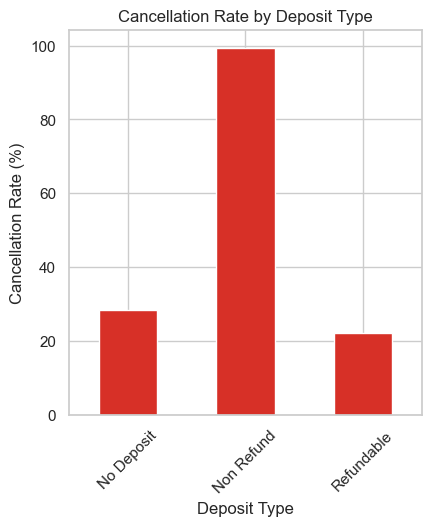

In [330]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
deposit_cancel_data = df_q5.groupby('deposit_type')['is_canceled'].mean() * 100
deposit_cancel_data.plot(kind='bar', color='#d73027')
plt.title('Cancellation Rate by Deposit Type')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Deposit Type')
plt.xticks(rotation=45)

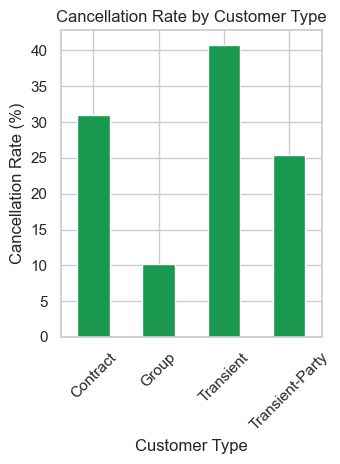

In [331]:
plt.subplot(1, 2, 2)
cust_cancel_data = df_q5.groupby('customer_type')['is_canceled'].mean() * 100
cust_cancel_data.plot(kind='bar', color='#1a9850')
plt.title('Cancellation Rate by Customer Type')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

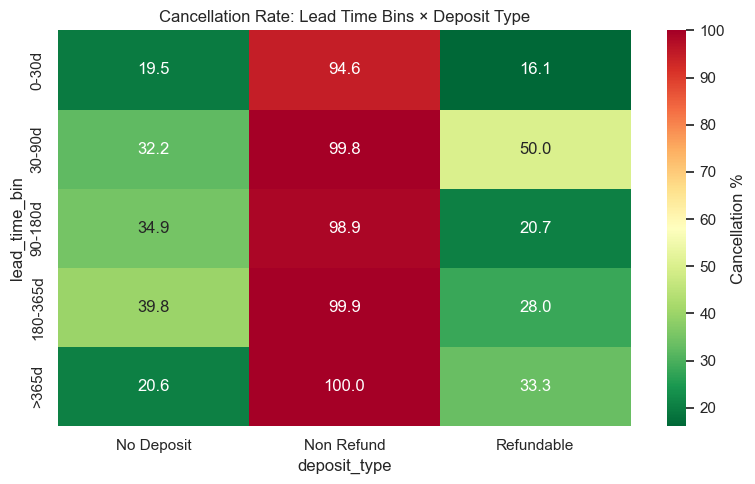

In [332]:
df_q5['lead_time_bin'] = pd.cut(df_q5['lead_time'], bins=[0, 30, 90, 180, 365, 750], 
                                  labels=['0-30d', '30-90d', '90-180d', '180-365d', '>365d'])
heatmap_data = pd.crosstab(df_q5['lead_time_bin'], df_q5['deposit_type'], 
                            values=df_q5['is_canceled'], aggfunc='mean') * 100
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r', cbar_kws={'label': 'Cancellation %'})
plt.title('Cancellation Rate: Lead Time Bins × Deposit Type')
plt.tight_layout()
plt.show()

## **Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?

The combination of lead_time, deposit_type, and customer_type reveals a pattern, deposits act as a commitment signal that moderates cancellation risk regardless of lead time. Bookings with Non Refund deposits show near-universal cancellation rates across all lead times, a pattern suggesting these are operational or data anomalies. Among actionable segments, No Deposit bookings exhibit moderate baseline cancellation that escalates with longer lead times, non-canceled guests average 79.8 days while canceled guests average 111.3 days. The "No Deposit" × "Transient" customer interaction produces the highest genuine cancellation risk. Transient customers overall show 40.75% cancellation with mean lead time of 138.6 days for cancellations vs 62.1 for completions. The three-way interaction further clarifies that first-time guests with No Deposit cancel at 28.94% with mean lead time of 90.9 days, while repeated guests with the same deposit type cancel at only 13.15% despite shorter horizons (31.1 days), confirming that the lead_time × deposit_type × customer_segment combination creates a hierarchical risk model where "no financial commitment + long booking window + transient booking" represents the highest cancellation cluster.